<p style="font-family: Times new roman; font-size:2.0em; color:blue; text-align:center; font-style:bold"><br> Stock Sentiment Analysis using News Headlines </p><br>


## About Dataset:
- The data set in consideration is a combination of the world news and stock price shifts avaiable on kaggle.
- There are 25 columns of top news headlines for each day in the data frame.
- Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo finance.
- Labels are based on Dow Jones Industrial Average Stock Index.
   - Class 1- the stock price increased.
   - Class 0- the stock price stayed the same or decreased.
   
## Problem Statement:
Stock sentiment analysis using news headlines.

## Teqnique to use
Used Bag of Words for extracting featues from the headlines.
Used Logistic Regression, SVM, Random Forest Classifier, Multinational Naive Bayes and Passive Aggressive Classifier for analysis.

## Import Libraries
Firstly, I will import all the necessary packages like pandas, numpy, seaborn, matplotlib which will help us to do all necessary operations further.

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# The first step of this project is to import all necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## First Glimse of Dataset
By using pandas library, I am going to read the datasets. I also have to use encoding 'ISO-8859-1' to read some special character in our dataset.

In [2]:
df= pd.read_csv('Data.csv',encoding='ISO-8859-1')
# Let's check the first 5 rows of our dataset.
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


## Explore the Dataset

In [3]:
# Let's check the dimention of my dataset.
df.shape

(4101, 27)

In [4]:
#Checking columns name
columns_name=df.columns
columns_name

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

My dataset has Date, Top25 comments, and label which is our target variable. It has two labels such as 1 and 0.
- 1 indicates the stock price increased based on top headlines features.
- 0 means the stock price stayed the same or decreased based on top headlines features.

The percentage of Y class : 0.47
The percentage of N class : 0.53


/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


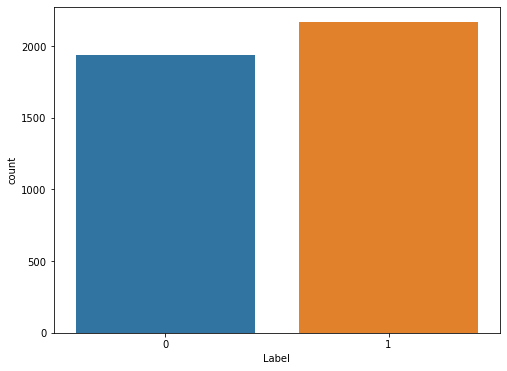

In [5]:
# let's look at the target percentage
plt.figure(figsize=(8,6))
sns.countplot(df['Label']);
print('The percentage of Y class : %.2f' % (df['Label'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Label'].value_counts()[1] / len(df)))

Since percentage of Y and N class are close to 50-50, We can consider it as balanced dataset.  

In [6]:
# Missing values
df.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [7]:
df.shape

(4101, 27)

We have some missing values on Three columns.

In [8]:
# Dropping missing values.
df.dropna(inplace = True)

# Checking missing value again.
df.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column


Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

When we drop some rows from dataset, our indexes became disorganized.

In [9]:
df.shape

(4098, 27)

In [10]:
df.reset_index(drop=True,inplace=True)


Now, it got fixed.

In [11]:
## Get the Independent Features.
X = df.drop(['Label','Date'], axis=1)
X.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


Now, my Independent features are in separate dataset.

In [12]:
## Get the Dependent feature.
y = df.Label
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64

## Data Preprocessing


In [13]:
# Let's remove all the punctuations from the train data.
data = X
#data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Let's rename all the columns for future convinient.
list1= [i for i in range(25)]
new_column_name=[str(i) for i in list1]
data.columns= new_column_name
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


It looks perfect!

In [14]:
# I am going to combine the top 25 top headlines for each record in the dataset to convert into vectors. If i don't add them as 
#paragrap, we can not use bag of word on it
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [15]:
#Checking the change in each rows
headlines[3]

"Pilgrim knows how to progress Thatcher facing ban McIlroy calls for Irish fighting spirit Leicester bin stadium blueprint United braced for Mexican wave Auntie back in fashion, even if the dress looks a bit tatty Shoaib appeal goes to the top Hussain hurt by 'shambles' but lays blame on earlier damage England's decade of disasters Revenge is sweet for jubilant Cronje Our choice, not theirs Profile of former US Nazi Party officer William Pierce New evidence shows record of war crimes suspect was not investigated The rise of the supernerds Written on the body Putin admits Yeltsin quit to give him a head start BBC worst hit as digital TV begins to bite How much can you pay for... Christmas glitches Upending a table, Chopping a line and Scoring a goal Scientific evidence 'unreliable', defence claims Fusco wins judicial review in extradition case Rebels thwart Russian advance Blair orders shake-up of failing NHS Lessons of law's hard heart"

As you can see, row three strings of the dataset are combined together.

In [16]:
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatized = WordNetLemmatizer()
corpus = []
for i in range(len(headlines)):
    review = re.sub('[^a-zA-Z]', ' ', headlines[i])
    # Convertng headlines to lower case which will help us overcome duplicating columns.
    review = review.lower()
    review = review.split()
    review = [lemmatized.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[3]

'pilgrim know progress thatcher facing ban mcilroy call irish fighting spirit leicester bin stadium blueprint united braced mexican wave auntie back fashion even dress look bit tatty shoaib appeal go top hussain hurt shamble lay blame earlier damage england decade disaster revenge sweet jubilant cronje choice profile former u nazi party officer william pierce new evidence show record war crime suspect investigated rise supernerds written body putin admits yeltsin quit give head start bbc worst hit digital tv begin bite much pay christmas glitch upending table chopping line scoring goal scientific evidence unreliable defence claim fusco win judicial review extradition case rebel thwart russian advance blair order shake failing nh lesson law hard heart'

## BAG OF WORDS

In [18]:
## Implement BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
countvector=CountVectorizer(ngram_range=(2,2))
X =countvector.fit_transform(corpus)

In [19]:
countvector.get_feature_names()[:20]


['aa aa',
 'aa aaa',
 'aa contract',
 'aa india',
 'aa jeanette',
 'aa milne',
 'aa pakistan',
 'aa staff',
 'aa try',
 'aaa aab',
 'aaa credit',
 'aaa huge',
 'aaa rating',
 'aaa seal',
 'aaaw nice',
 'aab world',
 'aabo able',
 'aadmi party',
 'aafia disappeared',
 'aafia siddiqui']

In [20]:
X.shape

(4098, 594427)

## Train Test Split 

In [21]:
# Importing train_test_split from sklearn.
from sklearn.model_selection import train_test_split

In [22]:
# Splitting the dataset into the Training set and Test set

X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.30,
                                                 random_state=101)

## Building  model
Traditional machine learning methods such as Naïve Bayes, Logistic Regression and Support Vector Machines (SVM) are widely used for large-scale sentiment analysis because they scale well.

## Logistic Regression

In [23]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [25]:
y_pred 

array([1, 1, 0, ..., 1, 1, 0])

#### Model Evaluation 

In [26]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']= y_pred
df_predicted.head()

,Actual,Predicted
2888,1,1
1877,1,1
1128,1,0
1555,1,1
1815,0,1


From the above result, we can see some of the prediction were not correct. Now, Let's check how many are mislabelled.

In [27]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} to {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 1230 to 628


In [28]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


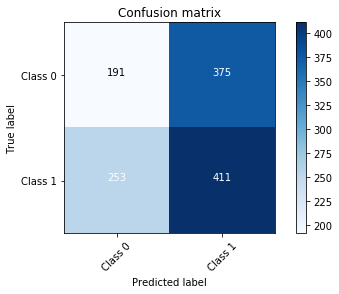

In [29]:
# Let's visualise it.
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'])


In [30]:
# Calculate accuracy sore
from sklearn.metrics import accuracy_score
print("Accuracy of test set is = ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy of test set is =  48.94308943089431 %


In [31]:
# We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[191 375]
 [253 411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.34      0.38       566
           1       0.52      0.62      0.57       664

    accuracy                           0.49      1230
   macro avg       0.48      0.48      0.47      1230
weighted avg       0.48      0.49      0.48      1230

Accuracy: 0.4894308943089431


## SVM

In [32]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} to {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 1230 to 623


Confusion matrix, without normalization


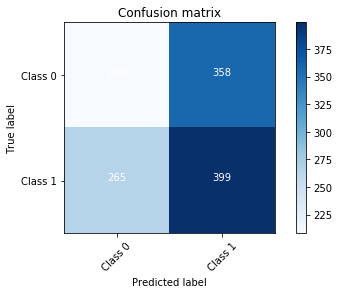

In [35]:
# Let's visualise it.
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'])

In [36]:
# Calculate accuracy sore
from sklearn.metrics import accuracy_score
print("Accuracy of test set is = ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy of test set is =  49.349593495934954 %


In [37]:
# We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[208 358]
 [265 399]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.37      0.40       566
           1       0.53      0.60      0.56       664

    accuracy                           0.49      1230
   macro avg       0.48      0.48      0.48      1230
weighted avg       0.49      0.49      0.49      1230

Accuracy: 0.49349593495934957


## RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [40]:
# Predicting the Test set results
y_pred = randomclassifier.predict(X_test)

## Model Evaluation

In [41]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']= y_pred
df_predicted.head()

,Actual,Predicted
2888,1,1
1877,1,1
1128,1,0
1555,1,1
1815,0,1


In [42]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} to {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 1230 to 579


Confusion matrix, without normalization


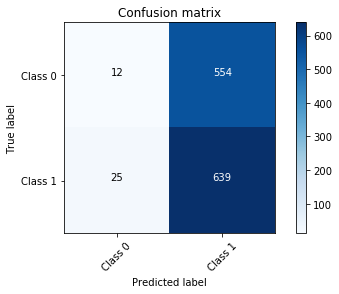

In [43]:
# Let's visualise it.
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'])

In [44]:
# Calculate accuracy sore
from sklearn.metrics import accuracy_score
print("Accuracy of test set is = ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy of test set is =  52.926829268292686 %


In [45]:
# We can check precision,recall,f1-score using classification report!
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 12 554]
 [ 25 639]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.02      0.04       566
           1       0.54      0.96      0.69       664

    accuracy                           0.53      1230
   macro avg       0.43      0.49      0.36      1230
weighted avg       0.44      0.53      0.39      1230

Accuracy: 0.5292682926829269


Our precision data indicates how good is our prediction. When the label is one, i.e. positive, its prediction is 54%. This is not good prediction. Here, the recall value is very good, i.e. 96% which states that out of total positive actual values only 96% prediction was right. On the other hand, the weighted average of f1-score is 69%. Thus, f1-score is somewhat all right.

## Results:
The accuracy of Logistic Regression is: 48.73 %

The accuracy of SVM is: 49.35 %

The accuracy of Random Forest Classification is: 52.92 %

The result w

## Conclusion
1. Most of the models have accuracy close to each other. However, Random Forest model predictions is better. 
2. Future work - In this analysis, I used Bag of Word instead of that I will use TF-IDF or Word2Vector to improve the accuracy.
